In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.datasets import mnist

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation


In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('x_train shape', X_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape (60000, 28, 28)


In [10]:
X_train = X_train.reshape(60000, 784)

In [11]:
X_train = X_train.astype('float32')

In [12]:
X_train /= 255

In [13]:
print(X_train.shape)

(60000, 784)


In [28]:
X_test = X_test.reshape(10000, 784)
X_test = X_test.astype('float32')
X_test /= 255
print("X_test shape", X_test.shape)

X_test shape (10000, 784)


In [14]:
classs = 10
y_train = to_categorical(y_train, classs)

In [15]:
model = Sequential()

In [21]:
model.add(Dense(10, input_shape=(784, )))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.add(Activation('relu'))

In [23]:
model.add(Dense(20))
model.add(Activation('relu'))

In [24]:
model.add(Dense(10))
model.add(Activation('softmax'))

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,280 (32.34 KB)

 Trainable params: 8,280 (32.34 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6065 - loss: 1.2933
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8897 - loss: 0.3925
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9121 - loss: 0.3091
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9211 - loss: 0.2759
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9250 - loss: 0.2645


In [38]:
# Dự đoán xác suất
predictions = model.predict(X_test)

# Lấy nhãn dự đoán
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


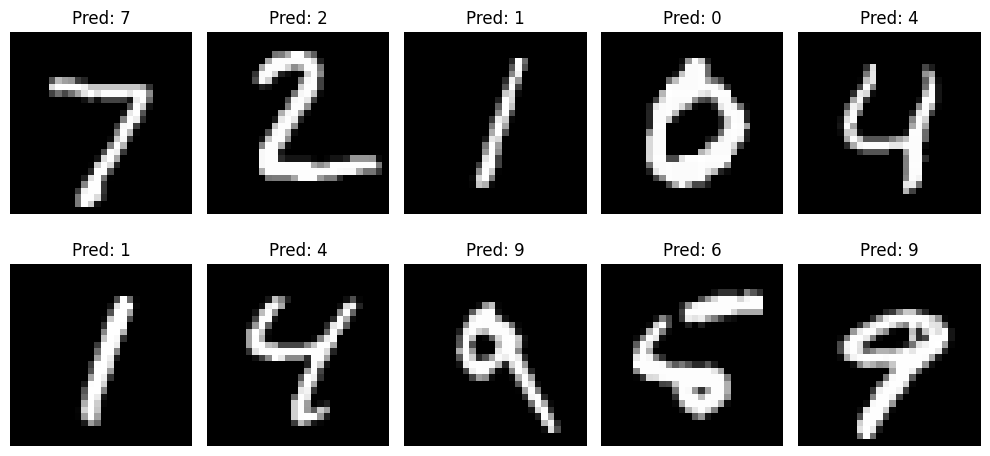

In [39]:
import matplotlib.pyplot as plt

# Chọn số lượng hình ảnh để hiển thị
num_images = 10

# Vẽ hình ảnh
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)  # 2 hàng, 5 cột
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Giả sử hình ảnh có kích thước 28x28
    plt.title(f'Pred: {predicted_classes[i]}')
    plt.axis('off')  # Tắt trục

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')